In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [15]:
df = pd.read_csv("/content/Mall_Customers[1].csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df.rename(columns={
    'Annual Income (k$)': 'AnnualIncome',
    'Spending Score (1-100)': 'SpendingScore'
}, inplace=True)

In [19]:
print(df.isna().sum())

CustomerID       0
Genre            0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


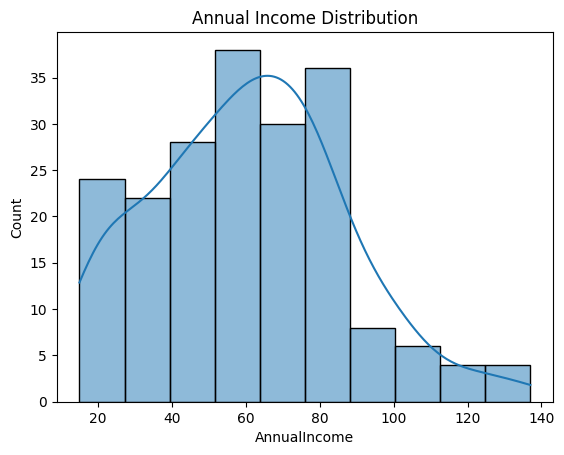

In [5]:
sns.histplot(df['AnnualIncome'], kde=True)
plt.title("Annual Income Distribution")
plt.show()

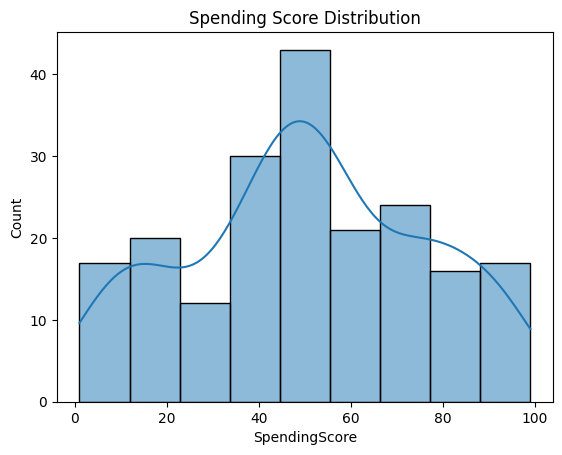

In [6]:
sns.histplot(df['SpendingScore'], kde=True)
plt.title("Spending Score Distribution")
plt.show()

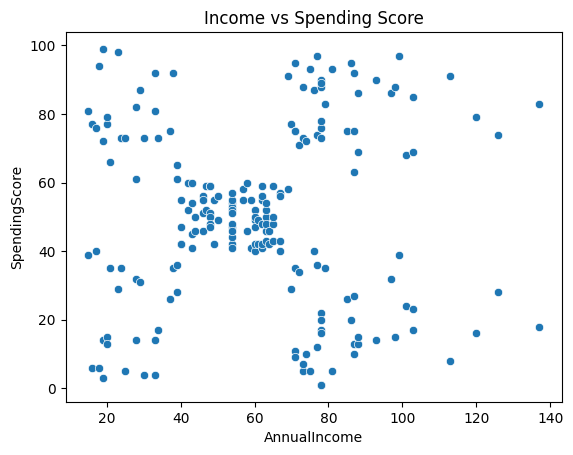

In [7]:
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df)
plt.title("Income vs Spending Score")
plt.show()

In [8]:
X = df[['AnnualIncome', 'SpendingScore']].values
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

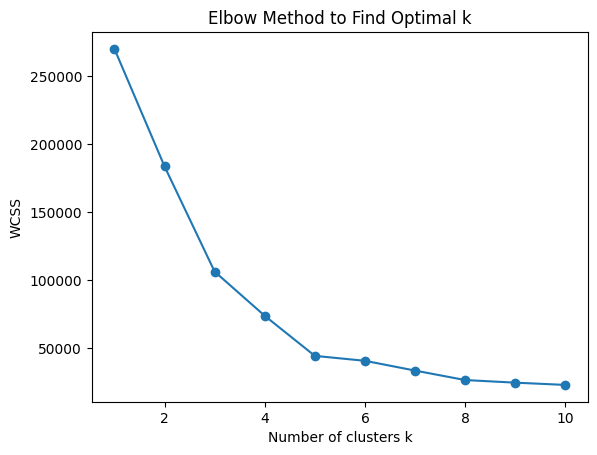

In [9]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal k')
plt.show()

In [10]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

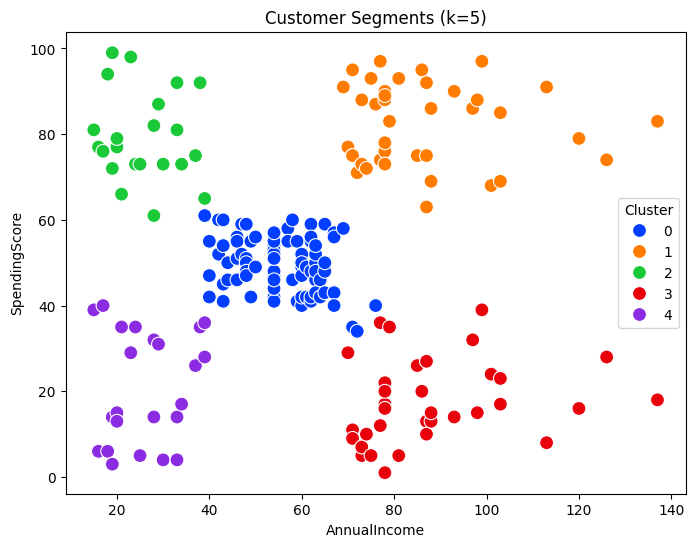

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='AnnualIncome', y='SpendingScore',
    hue='Cluster', palette='bright', data=df, s=100
)
plt.title(f'Customer Segments (k={k})')
plt.show()

In [12]:
centers = kmeans.cluster_centers_
for idx, center in enumerate(centers):
    print(f"Cluster {idx}: Income ≈ {center[0]:.1f}, Spending Score ≈ {center[1]:.1f}")


Cluster 0: Income ≈ 55.3, Spending Score ≈ 49.5
Cluster 1: Income ≈ 86.5, Spending Score ≈ 82.1
Cluster 2: Income ≈ 25.7, Spending Score ≈ 79.4
Cluster 3: Income ≈ 88.2, Spending Score ≈ 17.1
Cluster 4: Income ≈ 26.3, Spending Score ≈ 20.9
